# 1. Data Preprocessing

## 1.1 Import Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cal
import datetime

In [ ]:
customer = pd.read_csv('Case Study - Customer.csv', delimiter = ';')
product = pd.read_csv('Case Study - Product.csv', delimiter = ';')
store = pd.read_csv('Case Study - Store.csv', delimiter = ';')
transaction = pd.read_csv('Case Study - Transaction.csv', delimiter = ';')

In [ ]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


## 1.2 Data Cleaning

### 1.2.1 Familiarize with the Dataset

In [ ]:
print(customer.info())
print()
print(product.info())
print()
print(store.info())
print()
print(transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      

From the output, it can concluded that every dataset at least consists of integer value variables and object / string variables. This means that the object variables would be converted later on into integer / using one hot encoding so we can run the model. For the 'product', 'store', and 'transaction' dataset, it can been that it is free from missing value. While in the 'customer' dataset, for 'Marital Status' it is detected to have 3 null values.

### 1.2.2 Handling Missing Values

By using the "info()", it actually already can see the total number of null values. But, we wanted to recheck as well as fill the missing values if existed.

In [ ]:
print(customer.isna().sum())
print()
print(product.isna().sum())
print()
print(store.isna().sum())
print()
print(transaction.isna().sum())

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

ProductID       0
Product Name    0
Price           0
dtype: int64

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64


In [ ]:
customer = customer.fillna(method='ffill')

In [ ]:
print(customer.isna().sum())
print()
print(customer.info())

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None


### 1.2.3 Check Structural Errors

This step is actually to ensure that logically, the value of ever variables are making sense or is it already correct grammarly or not. From the view of the dataset that we can see from the first step, we can see that decimal number still using comma instead of dot. And also, for the date format in the 'transaction' dataset, we would change the format so we can use it for the time series later on.

In [ ]:
customer['Income'] = customer['Income'].str.replace(',', '.')
customer['Income'] = customer['Income'].astype(float)
store['Longitude'] = store['Longitude'].str.replace(',', '.')
store['Longitude'] = store['Longitude'].astype(float)
store['Latitude'] = store['Latitude'].str.replace(',', '.')
store['Latitude'] = store['Latitude'].astype(float)
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

In [ ]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [ ]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [ ]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


## 1.3 Merge Dataset and Check Data Irregularities

The purpose of making this machine learning model is to be able to predict the total daily quantity of products sold through time series methods.

In [ ]:
tr_customer = pd.merge(left = transaction,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'left')

tr_cst_pro = pd.merge(left = tr_customer,
                  right = product,
                  left_on = ['ProductID', 'Price'],
                  right_on = ['ProductID', 'Price'],
                  how = 'left')

df_merge = pd.merge(left = tr_cst_pro,
            right = store,
            left_on = 'StoreID',
            right_on = 'StoreID',
            how = 'left')

In [ ]:
df_merge = df_merge.drop_duplicates()
df_merge.duplicated().sum()

0

In [ ]:
df_merge.rename(columns = {"Product Name": "ProductName", "Marital Status": "MaritalStatus"}, inplace = True)
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,MaritalStatus,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


# 2. Exploratory Data Analysis (EDA)

## 2.1 Visualization

In [ ]:
df_merge['month'] = df_merge['Date'].dt.month

In [ ]:
# Quantity per Bulan
df_merge.groupby('month').agg({'Qty':'sum'})

,Qty
month,
1,1560
2,1441
3,1753
4,1554
5,1589
6,1592
7,1532
8,1492
9,1499


In [ ]:
# TotalAmount dari Hari ke Hari
df_merge.groupby('Date').agg({'TotalAmount':'sum'})

,TotalAmount
Date,
2022-01-01,431200
2022-01-02,613600
2022-01-03,561300
2022-01-04,396500
2022-01-05,273400
...,...
2022-12-27,647300
2022-12-28,599000
2022-12-29,437900


In [ ]:
# Jumlah Qty by Product
df_merge.groupby('ProductName').agg({'Qty':'sum'})

,Qty
ProductName,
Cashew,627
Cheese Stick,1841
Choco Bar,2408
Coffee Candy,2097
Crackers,1824
Ginger Candy,2626
Oat,965
Potato Chip,1092
Thai Tea,2853


In [ ]:
# Jumlah TotalAmount berdasarkan StoreName
df_merge.groupby('StoreName').agg({'TotalAmount':'sum'})

,TotalAmount
StoreName,
Bonafid,11595600
Buana,11332000
Buana Indah,10629900
Gita Ginara,11116100
Harapan Baru,11329500
Lingga,25294100
Prestasi Utama,12285200
Priangan,10995100
Prima Kelapa Dua,12136300


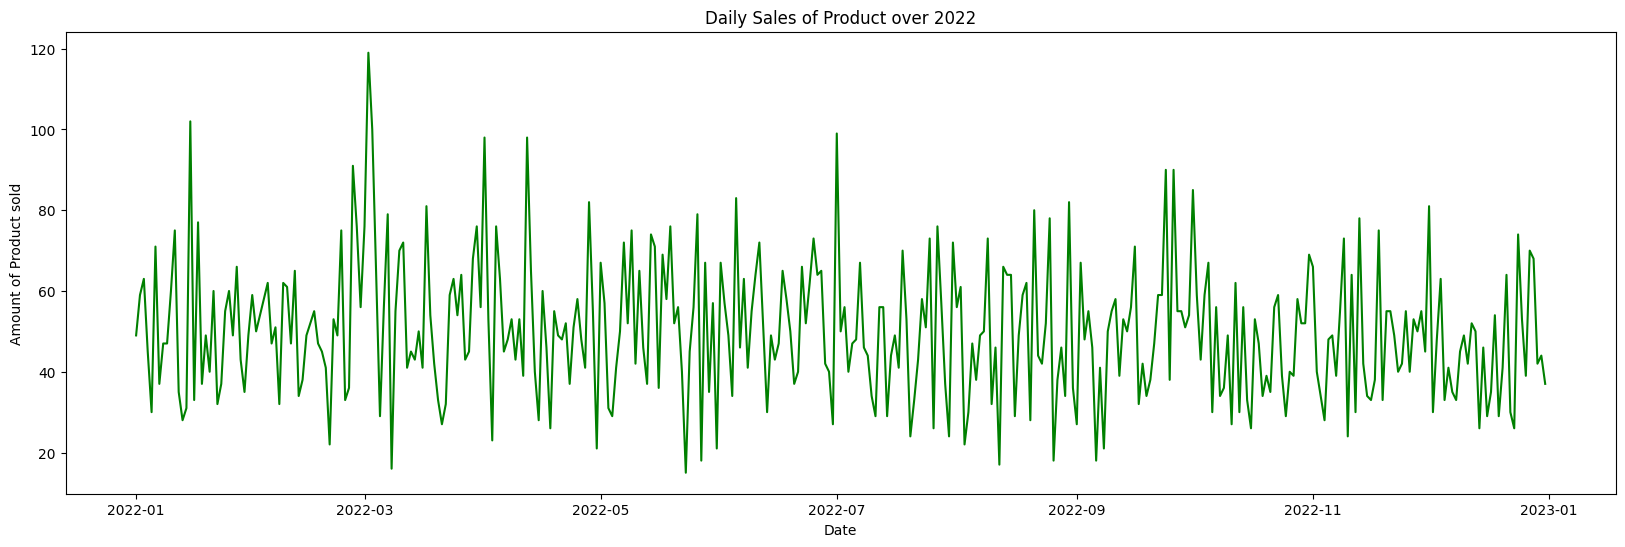

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df_merge.groupby('Date').agg({'Qty':'sum'})['Qty'], color ='green')
plt.xlabel('Date')
plt.ylabel('Amount of Product sold')
plt.title('Daily Sales of Product over 2022')
plt.show()

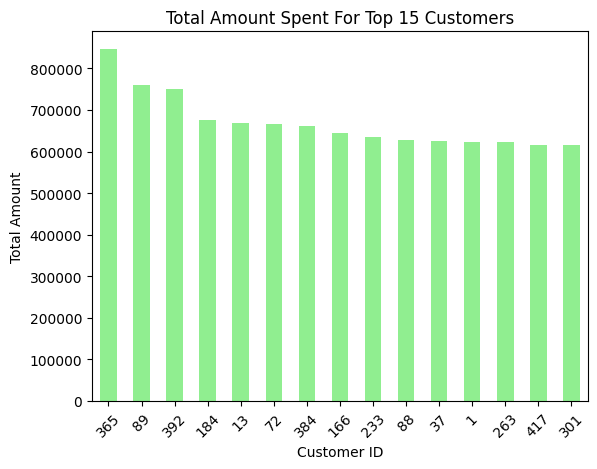

<Figure size 1500x1000 with 0 Axes>

In [ ]:
top_customers = df_merge.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False)[:15]
top_customers.plot(kind='bar', color = 'lightgreen')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.title('Total Amount Spent For Top 15 Customers')
plt.xticks(rotation=45)
plt.figure(figsize=(15,10))
plt.show()

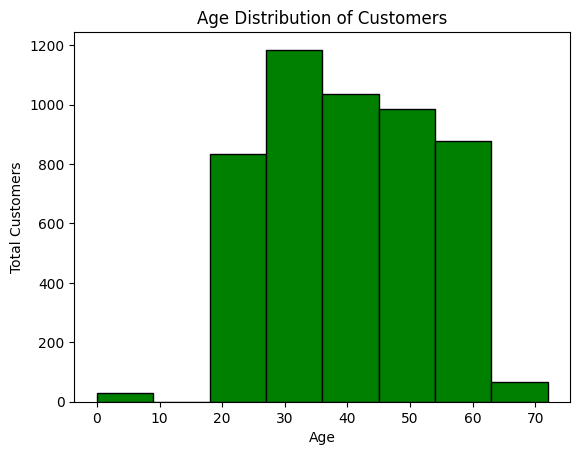

<Figure size 2500x1000 with 0 Axes>

In [ ]:
plt.hist(df_merge['Age'], bins = 8, color='green', edgecolor ='black')
plt.xlabel('Age')
plt.ylabel('Total Customers')
plt.title('Age Distribution of Customers')
plt.figure(figsize=(25,10))
plt.show()

<Figure size 1500x1000 with 0 Axes>

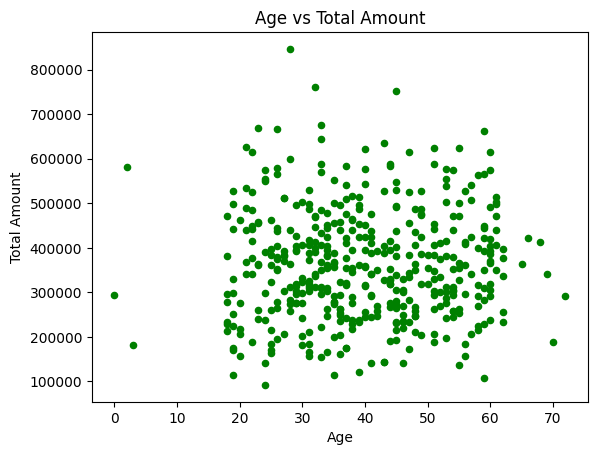

In [ ]:
df_ta = df_merge.groupby('CustomerID').agg({'TotalAmount':'sum'})
df_age_ta = pd.merge(left = df_ta,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'left')
plt.figure(figsize=(15,10))
df_age_ta.plot.scatter(x = "Age", y = "TotalAmount", color = 'green')
df_age_ta
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.title("Age vs Total Amount")
plt.show()

## 2.2 Check the Boxplot

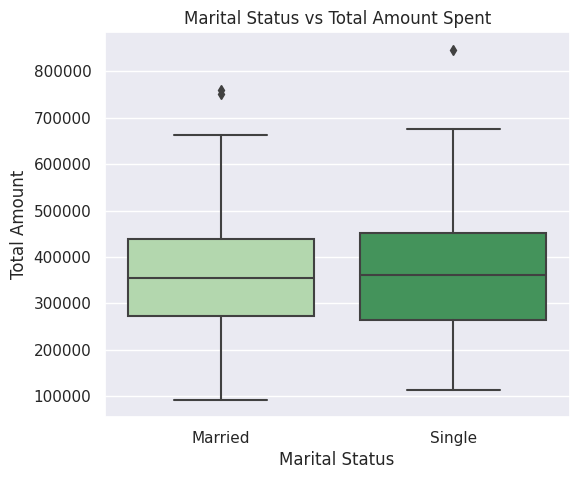

In [ ]:
df1 = df_merge.groupby('CustomerID').agg({'TotalAmount':'sum', 'Qty':'sum'})
df2 = pd.merge(left = df1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'right')
plt.figure(figsize = (6, 5))
sns.set(style="darkgrid")
sns.boxplot(x = "Marital Status", y = "TotalAmount", data = df2, palette = 'Greens')
plt.xlabel("Marital Status")
plt.ylabel("Total Amount")
plt.title("Marital Status vs Total Amount Spent")
plt.show()

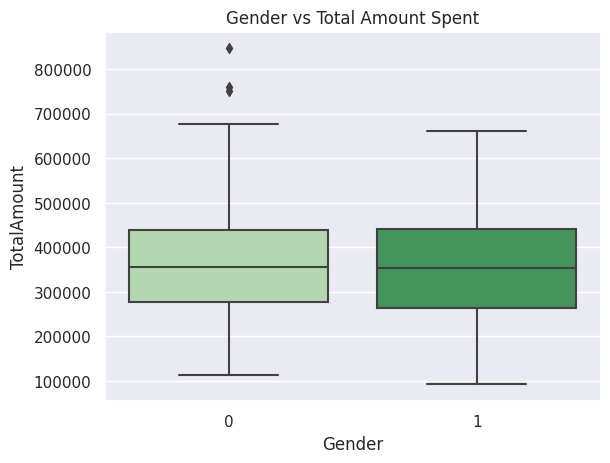

In [ ]:
daf1 = df_merge.groupby('CustomerID').agg({'TotalAmount':'sum', 'Qty':'sum'})
df2 = pd.merge(left = df1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'right')
sns.boxplot(x = "Gender", y = "TotalAmount", data = df2, palette = 'Greens')
plt.xlabel("Gender")
plt.ylabel("TotalAmount")
plt.title("Gender vs Total Amount Spent")
plt.show()

## 2.3 Comparison

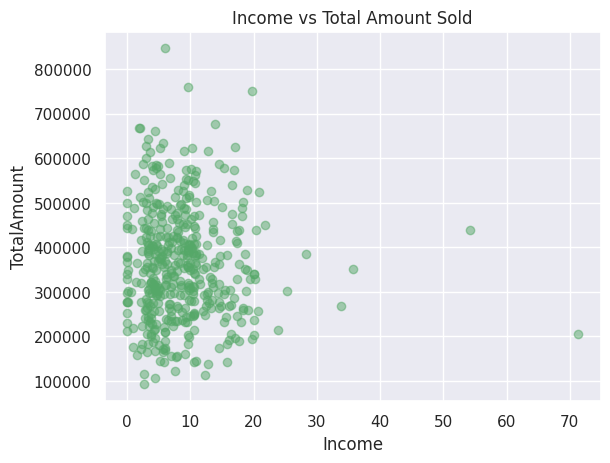

In [ ]:
df1 = df_merge.groupby('CustomerID').agg({'TotalAmount':'sum', 'Qty':'sum'})
df2 = pd.merge(left = df1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'right')
plt.scatter(df2['Income'], df2['TotalAmount'], alpha=0.5 , color = 'g')
plt.xlabel('Income')
plt.ylabel('TotalAmount')
plt.title('Income vs Total Amount Sold')
plt.show()

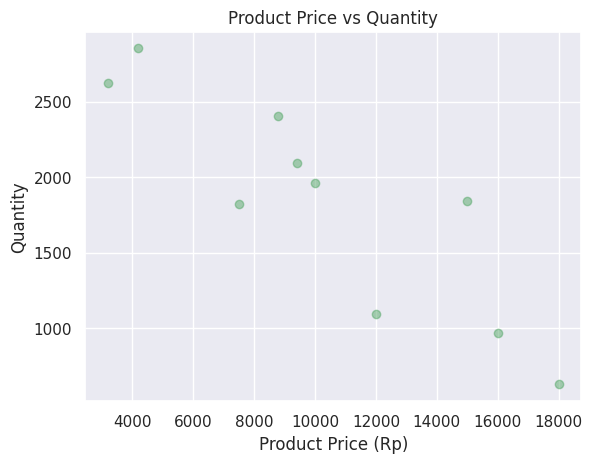

In [ ]:
df1 = df_merge.groupby('ProductID').agg({'Qty':'sum'})
df2 = pd.merge(left = df1,
                  right = product,
                  left_on = 'ProductID',
                  right_on = 'ProductID',
                  how = 'left')
plt.scatter(df2['Price'], df2['Qty'], alpha=0.5, color = 'g')
plt.xlabel('Product Price (Rp)')
plt.ylabel('Quantity')
plt.title('Product Price vs Quantity')
plt.show()

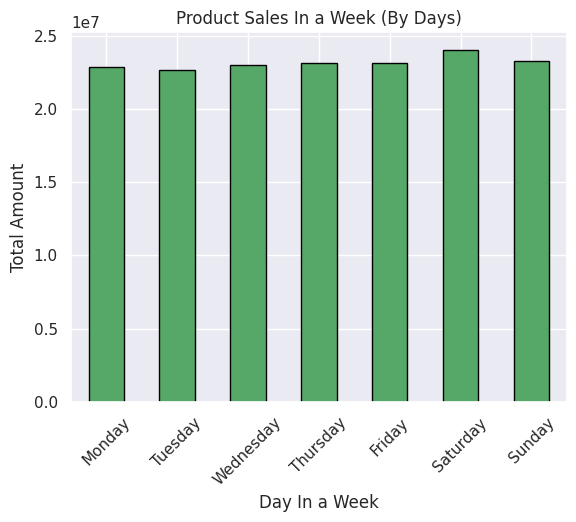

In [ ]:
df_merge['DayInWeek'] = df_merge['Date'].dt.day_name()
per_day = df_merge.groupby('DayInWeek')['TotalAmount'].sum()
per_day = per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
per_day.plot(kind='bar', color ='g', edgecolor = 'black')
plt.xlabel('Day In a Week')
plt.ylabel('Total Amount')
plt.title('Product Sales In a Week (By Days)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

<ipython-input-34-bb35da49995c>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


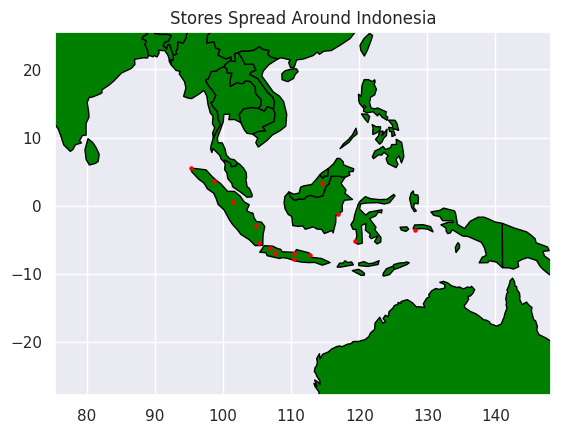

In [ ]:
geom = [Point(xy) for xy in zip(store['Longitude'], store['Latitude'])]
gdf = gpd.GeoDataFrame(store, geometry=geom)

latitude_range = (min(store['Latitude']) - 20, max(store['Latitude']) + 20)
longitude_range = (min(store['Longitude']) - 20, max(store['Longitude']) + 20)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='green', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.title('Stores Spread Around Indonesia')
plt.xlim(longitude_range)
plt.ylim(latitude_range)
plt.show()

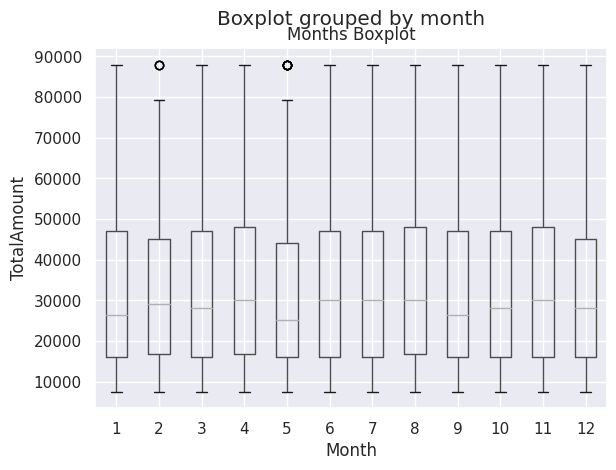

<Figure size 2000x600 with 0 Axes>

In [ ]:
df_copy = df_merge.copy()
df_copy.set_index('Date', inplace=True)

# Create a new column for the month
df_copy['month'] = df_copy.index.month

# Create box plots for each month
df_copy.boxplot(column='TotalAmount', by='month')
plt.xlabel('Month')
plt.ylabel('TotalAmount')
plt.title('Months Boxplot')
plt.figure(figsize=(20,6))
plt.show()

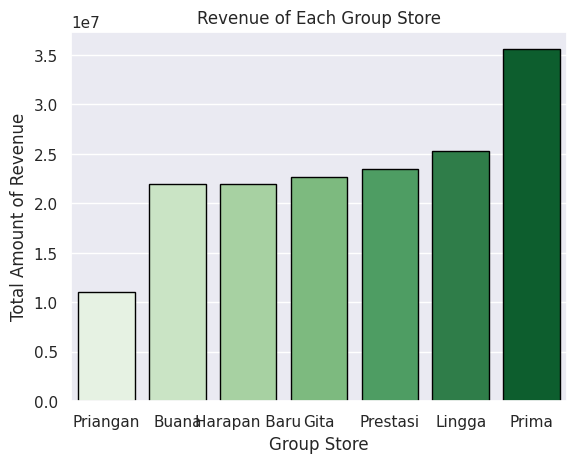

In [ ]:
df1 = df_merge.groupby('GroupStore').agg({'TotalAmount':'sum', 'Qty':'sum'})
df2 = pd.merge(left = df1,
                  right = store,
                  left_on = 'GroupStore',
                  right_on = 'GroupStore',
                  how = 'left')
df2 = df2.sort_values('TotalAmount')
sns.barplot(x = "GroupStore", y = "TotalAmount", data = df2, palette = 'Greens', edgecolor ='black')
plt.xlabel("Group Store")
plt.ylabel("Total Amount of Revenue")
plt.title("Revenue of Each Group Store")
plt.show()

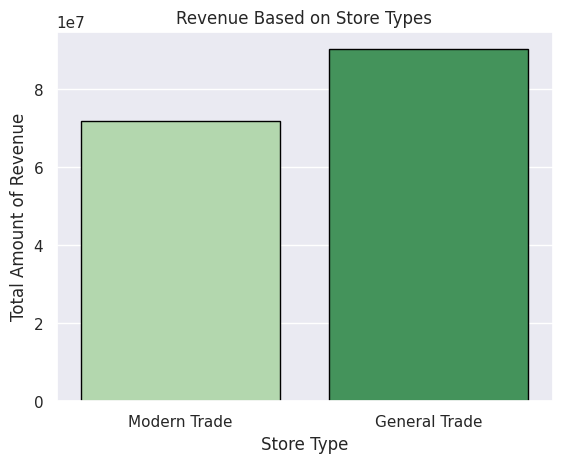

In [ ]:
df1 = df_merge.groupby('Type').agg({'TotalAmount':'sum', 'Qty':'sum'})
df2 = pd.merge(left = df1,
                  right = store,
                  left_on = 'Type',
                  right_on = 'Type',
                  how = 'left')
df2 = df2.sort_values('TotalAmount')
sns.barplot(x = "Type", y = "TotalAmount", data = df2, palette = 'Greens', edgecolor = 'black')
plt.xlabel("Store Type")
plt.ylabel("Total Amount of Revenue")
plt.title("Revenue Based on Store Types")
plt.show()

## 2.4 Correlations

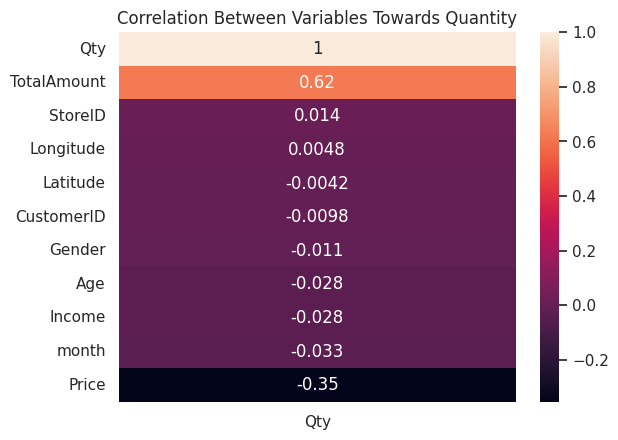

In [ ]:
df_corr = df_merge.copy()
numeric_columns = df_corr.select_dtypes(include=['number'])
corrmap = numeric_columns.corr()[['Qty']].sort_values(by = ['Qty'], ascending = False)
sns.heatmap(corrmap, annot = True)
plt.title('Correlation Between Variables Towards Quantity')
plt.show()

# 3. Time Series : ARIMA Modelling

In [ ]:
df_ts = df_merge.copy()

## 3.1 Aggregating Date

In [ ]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts.set_index('Date', inplace=True)
df_qty = df_ts.groupby('Date').agg({'Qty':'sum'})

In [ ]:
from pylab import rcParams

<Axes: xlabel='Date'>

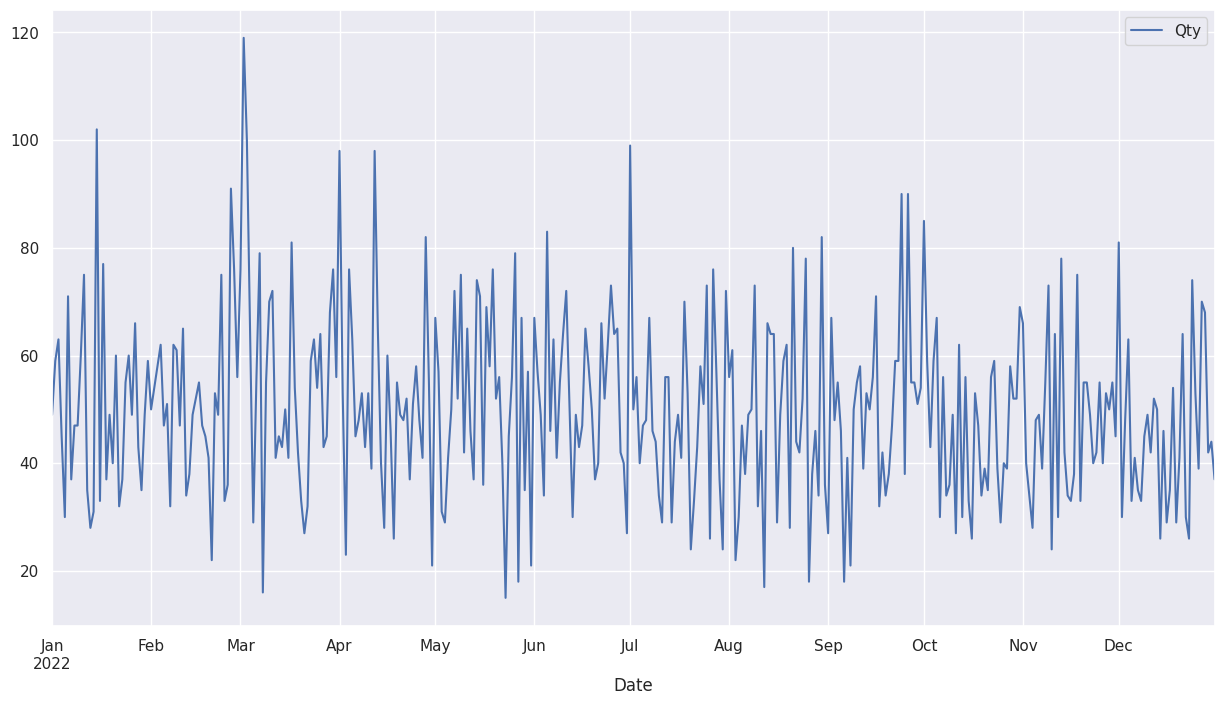

In [ ]:
rcParams['figure.figsize'] = 15, 8
df_qty.plot()

## 3.2 Identify Stationarity

Ho: It is non-stationary

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

---------------------------

H1: It is stationary

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.




In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(quantity):
  result = adfuller(quantity)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
  for value,label in zip(result,labels):
    print(label+' : '+str(value) )

  if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
      print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [ ]:
adfuller_test(df_qty['Qty'])

ADF Test Statistic : -19.448086319449082
p-value : 0.0
#Lags Used : 0
Number of Observations : 364
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


## 3.3 Identify Seasonality Difference

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

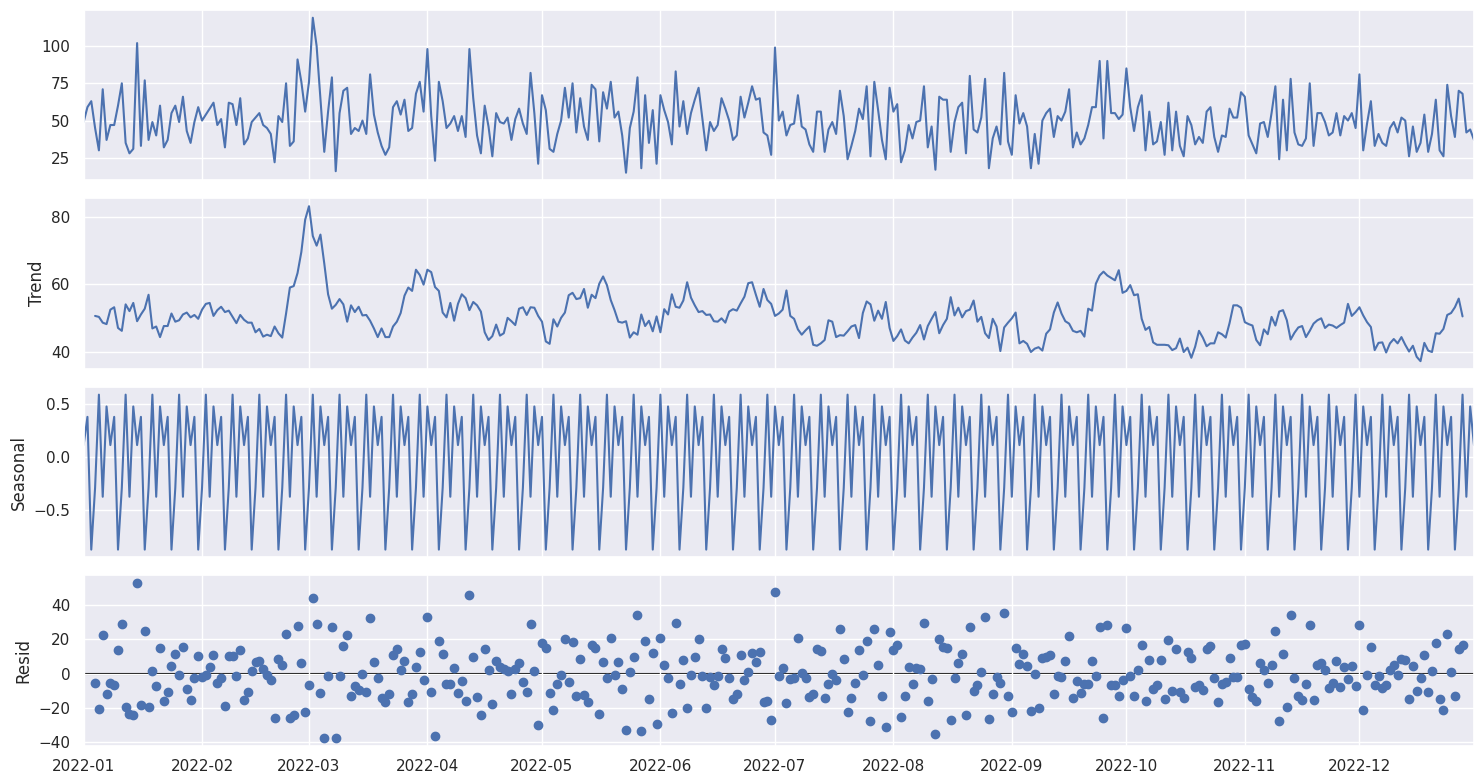

In [ ]:
rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(df_qty, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
df_season = df_qty.copy()
df_season['Quantity First Difference'] = df_season['Qty'] - df_season['Qty'].shift(1)
df_season['Seasonal First Difference'] = df_season['Qty'] - df_season['Qty'].shift(12)
df_season.head()

,Qty,Quantity First Difference,Seasonal First Difference
Date,,,
2022-01-01,49,NaN,NaN
2022-01-02,59,10.0,NaN
2022-01-03,63,4.0,NaN
2022-01-04,45,-18.0,NaN
2022-01-05,30,-15.0,NaN


In [ ]:
adfuller_test(df_season['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.67956366792047
p-value : 4.322883783680308e-14
#Lags Used : 11
Number of Observations : 341
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Axes: xlabel='Date'>

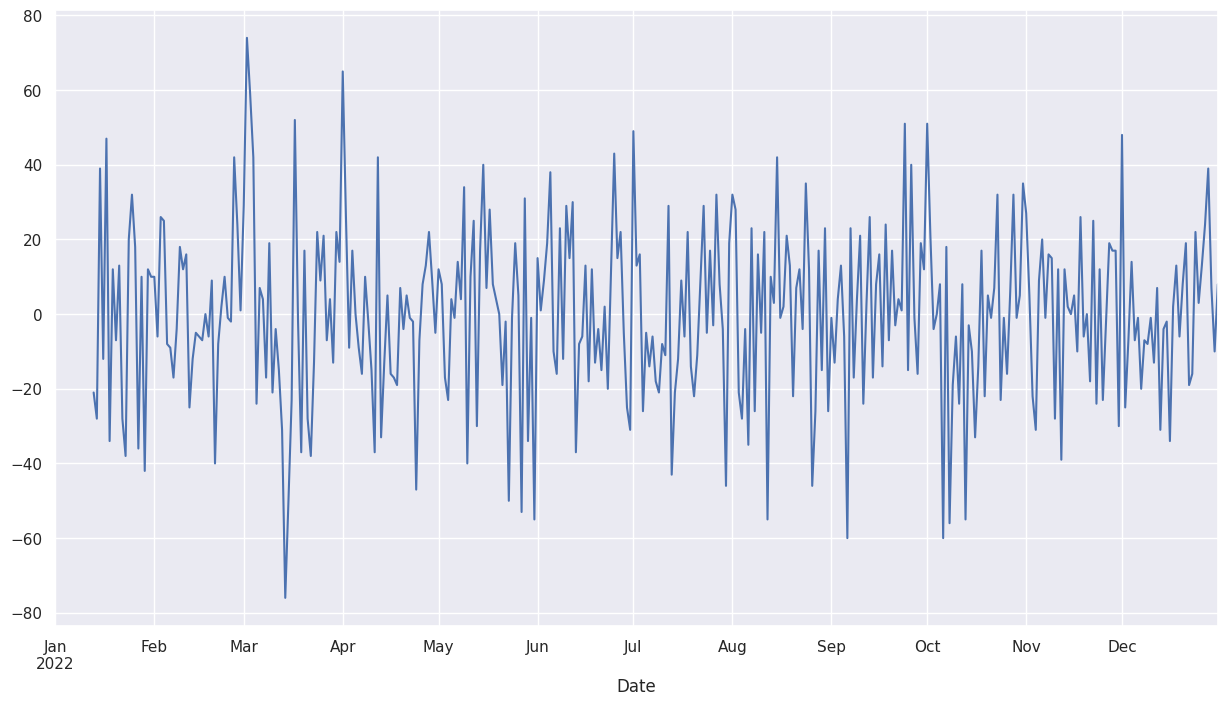

In [ ]:
df_season['Seasonal First Difference'].plot()

## 3.4 Autocorrelation

In [ ]:
from pandas.plotting import autocorrelation_plot

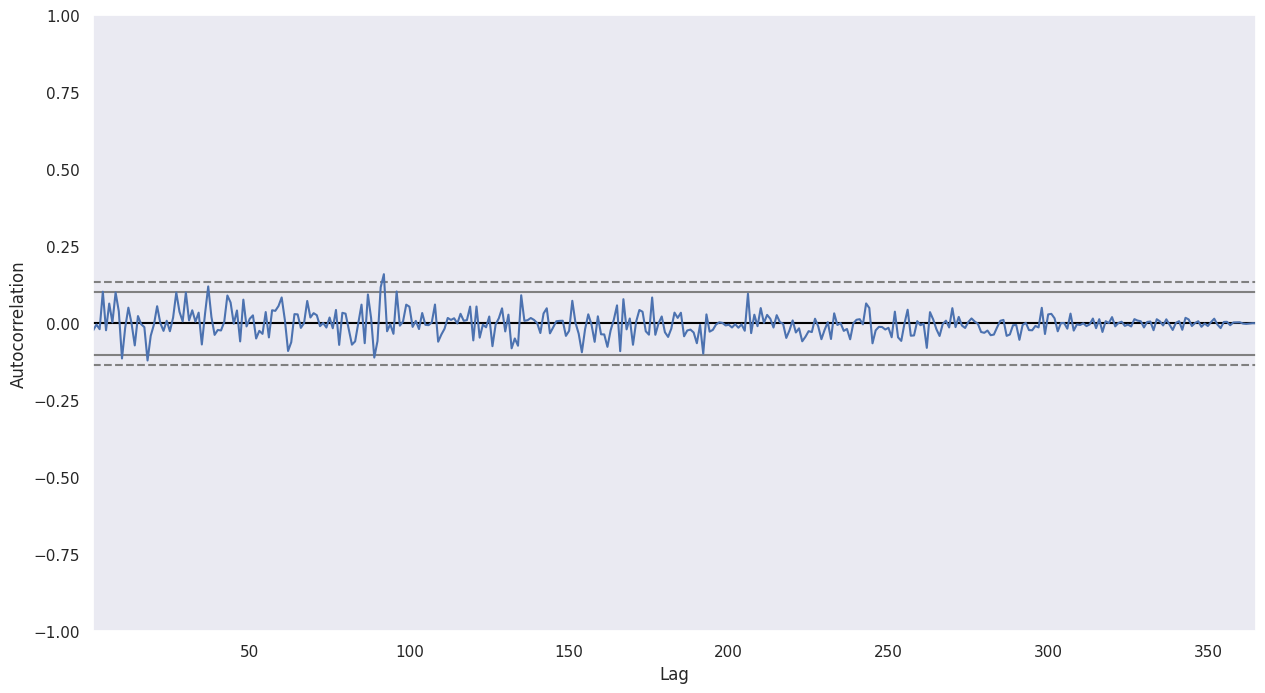

In [ ]:
autocorrelation_plot(df_season['Qty'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

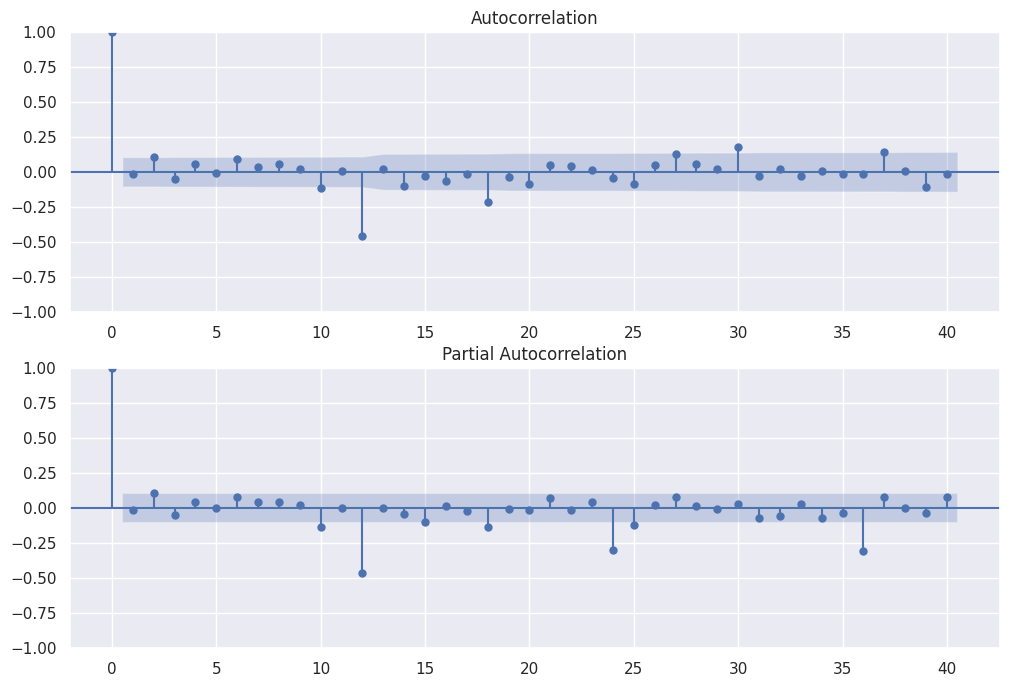

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_season['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_season['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

## 3.5 Model Predicting

### 3.5.1 Train Test Split

In [ ]:
train = df_qty.iloc[:-110]
test = df_qty.iloc[-110:]

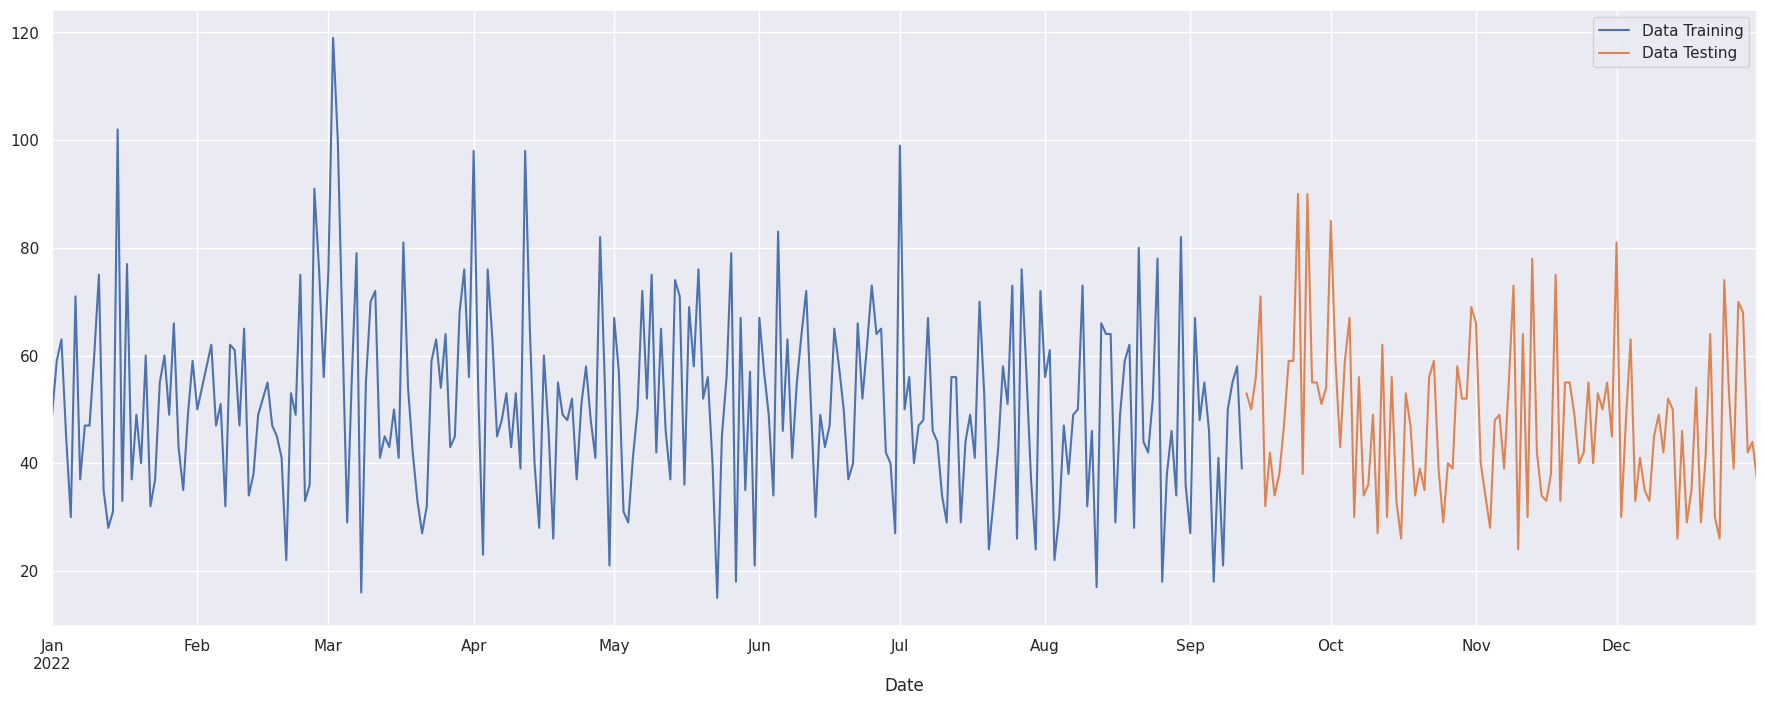

In [ ]:
train['Qty'].plot(figsize = (22, 8), legend = True, label = 'Data Training')
test['Qty'].plot(legend = True, label = 'Data Testing')
plt.show()

### 3.5.2 Model Fitting

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.2
    Uninstalling scipy-1.11.2:
      Successfully uninstalled scipy-1.11.2


In [ ]:
from pmdarima import auto_arima

In this case, we would use the stepwise search for the modelling to find the best parameter for ARIMA

In [ ]:
model = auto_arima(train['Qty'], start_p = 1, start_q = 1, max_p = 5,
                            max_q = 5, m = 1, start_P = 0, seasonal = False,
                            d = 1, D = 1, trace = True, error_action = 'ignore',
                            supress_warnings = True, stepwise = True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2356.039, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2290.826, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2354.040, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2266.888, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2228.550, Time=0.20 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2225.664, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2210.990, Time=0.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2208.997, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2223.667, Time=0.31 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2182.888, Time=1.44 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2182.013, T

### 3.5.3 Predicting Data Testing

In [ ]:
predict_test = model.predict(start = len(train),n_periods = len(test))

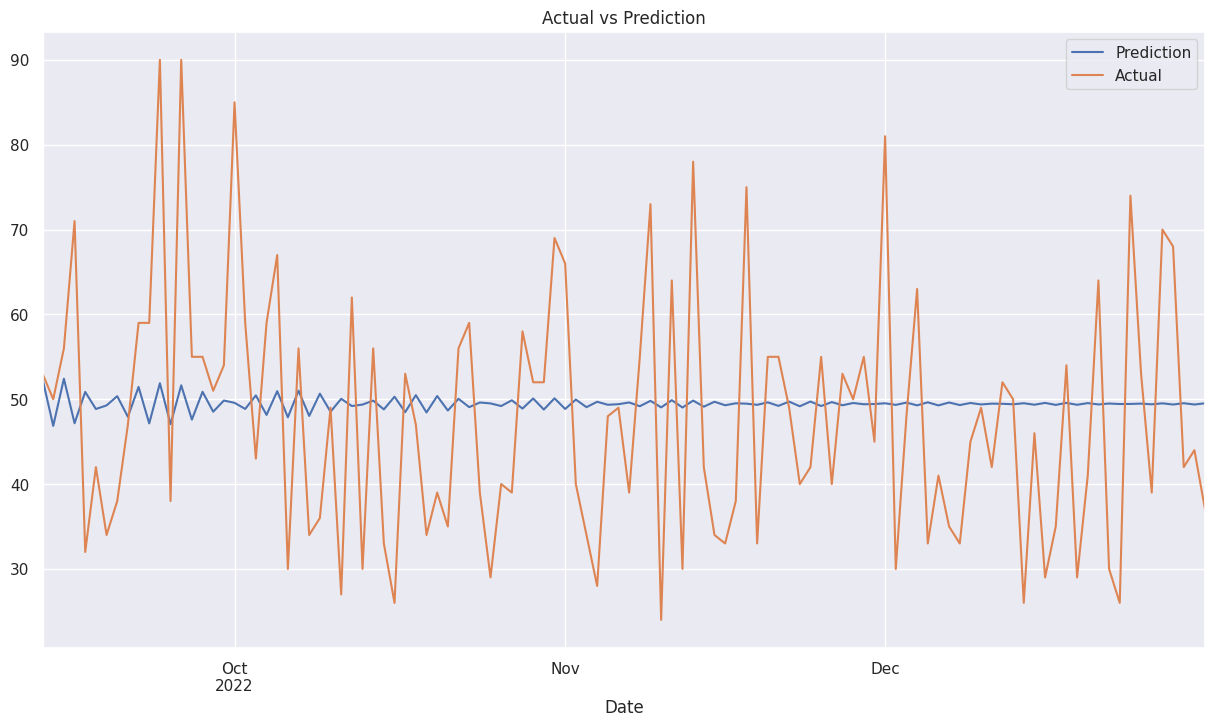

In [ ]:
predict_test.plot(legend=True, label = 'Prediction')
test['Qty'].plot(legend = True, label = 'Actual')
plt.title('Actual vs Prediction')
plt.show()

<Axes: xlabel='Date'>

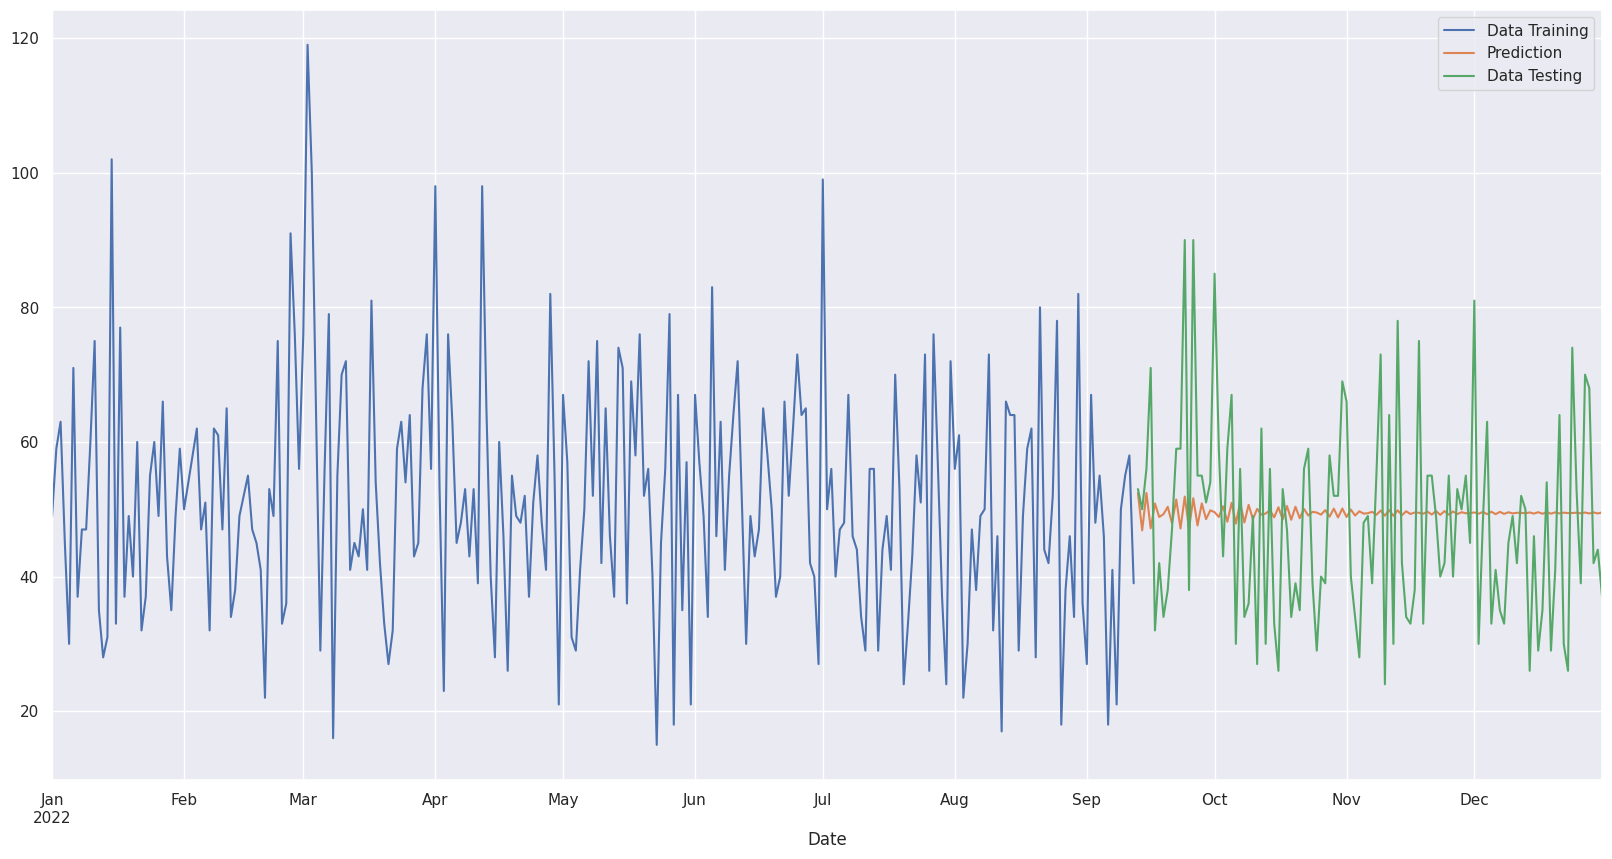

In [ ]:
train['Qty'].plot(legend = True, label = 'Data Training', figsize = (20, 10))
predict_test.plot(legend=True, label = 'Prediction')
test['Qty'].plot(legend = True, label = 'Data Testing')

In [ ]:
pred_qty = model.predict(n_periods = 190, typ = 'levels').rename('ARIMA Forecast')
pred_qty = pred_qty[110:-49]

Plotting Training, Testing Data, Forecast by ARIMA, and ARIMA Predictions on Future Dates

<Axes: xlabel='Date'>

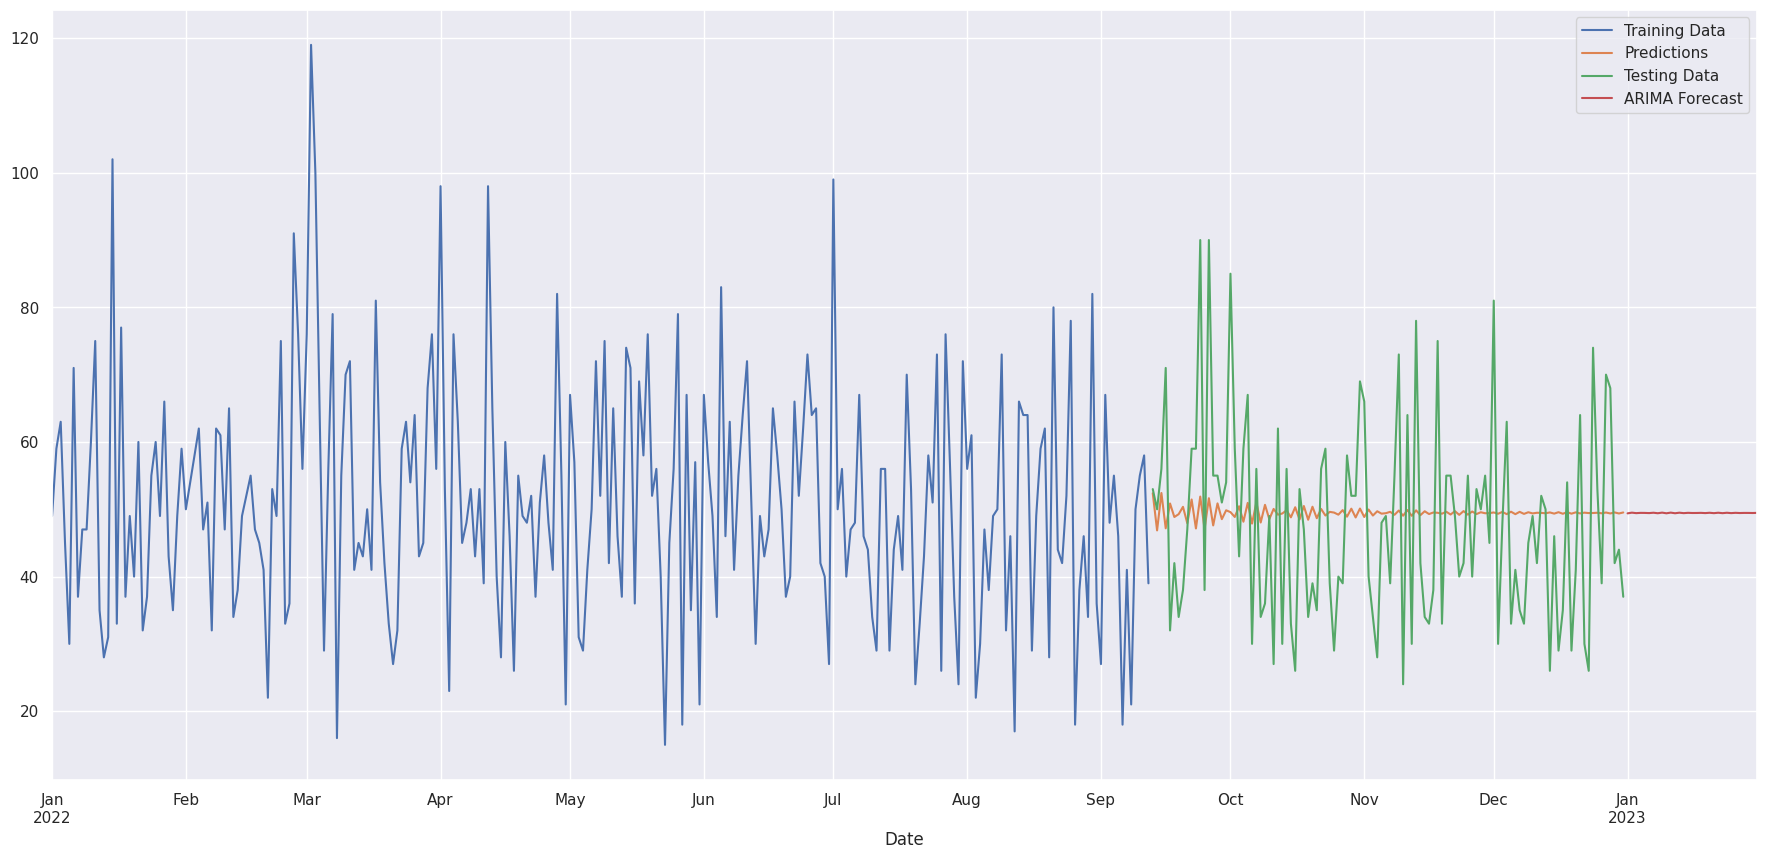

In [ ]:
train['Qty'].plot(legend = True, label = 'Training Data', figsize = (22, 10))
predict_test.plot(legend=True, label = 'Predictions')
test['Qty'].plot(legend = True, label = 'Testing Data')
pred_qty.plot(legend = True)

## 3.6 Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def calculate_mape(actual, predicted) -> float:

    if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    # Calculate the MAPE value and return
    return round(np.mean(np.abs((actual - predicted) / actual)) * 100, 2)

def calculate_explained_variance(y_true, y_pred):
    mean_actual = np.mean(y_true)
    explained_variance = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - mean_actual) ** 2)
    return explained_variance

In [ ]:
mape = calculate_mape(test['Qty'], predict_test)
mae = mean_absolute_error(test['Qty'], predict_test)
mse = mean_squared_error(test['Qty'], predict_test)
rmse = np.sqrt(mse)
explained_variance = calculate_explained_variance(test['Qty'], predict_test)

In [ ]:
print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Explained Variance: {explained_variance:.2f}")

MAPE: 28.63%
MAE: 12.05
MSE: 216.95
RMSE: 14.73
Explained Variance: 0.00


# 4. Clustering

## 4.1 Merging data

In [ ]:
df_cluster = pd.merge(left = transaction,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'left')

In [ ]:
df_cluster = pd.merge(left = df_cluster,
                  right = product,
                  left_on = ['ProductID', 'Price'],
                  right_on = ['ProductID', 'Price'],
                  how = 'left')

In [ ]:
df_cluster = pd.merge(left = df_cluster,
                  right = store,
                  left_on = 'StoreID',
                  right_on = 'StoreID',
                  how = 'left')

In [ ]:
df_cluster = df_cluster.drop_duplicates()

## 4.2 Aggregating Data

In [ ]:
df_cluster = df_cluster.groupby('CustomerID').agg({'TransactionID':'count',
                                                'Qty': 'sum',
                                                'TotalAmount': 'sum'})

In [ ]:
df_cluster.head()

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


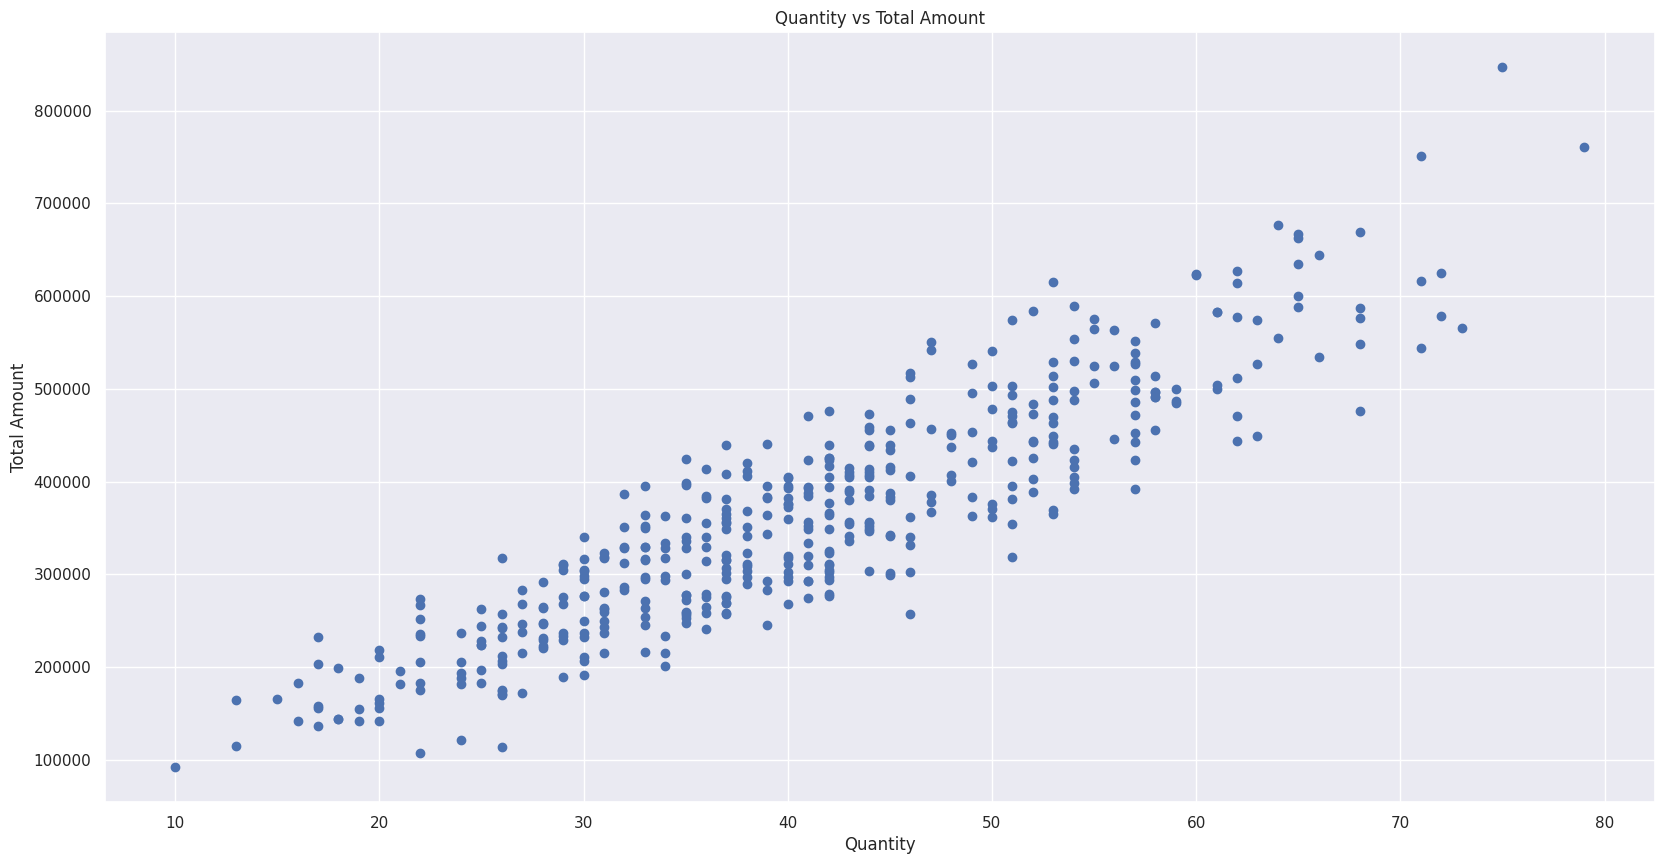

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(df_cluster['Qty'],
            df_cluster['TotalAmount'])
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Quantity vs Total Amount')
plt.show()

## 4.3 K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 4.3.1 Standardize the Data

In [ ]:
sc = StandardScaler()
sc.fit(df_cluster)
df_scaled = sc.transform(df_cluster)

### 4.3.2 Find K Using Elbow Method

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79cd1dea2050>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


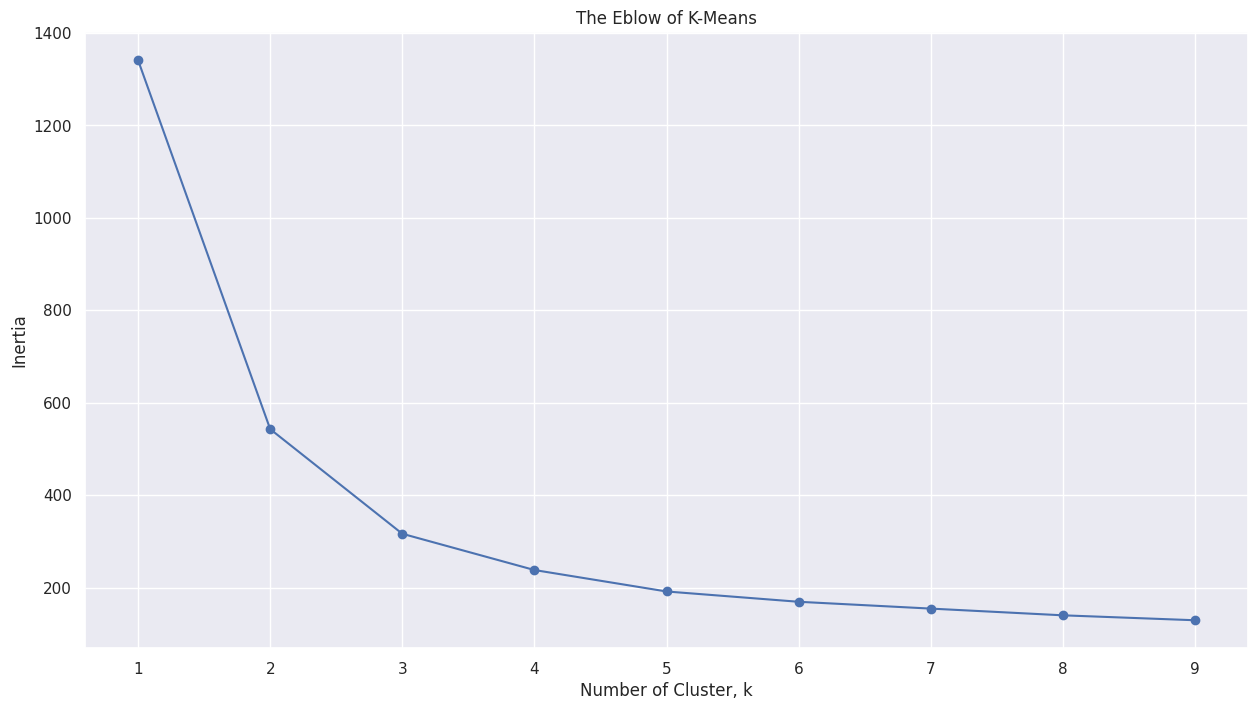

In [ ]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Cluster, k')
plt.ylabel('Inertia')
plt.title('The Eblow of K-Means')
plt.xticks(ks)
plt.show()

### 4.3.3 Model Fitting and Predicting

In [ ]:
model_kmeans = KMeans(n_clusters = 4, random_state = 50)
model_kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=50)

In [ ]:
labels = model_kmeans.predict(df_scaled)
print(labels)

[2 3 3 0 1 3 2 3 0 3 1 2 2 0 3 3 0 3 2 2 0 3 2 3 1 0 0 0 2 0 0 0 1 3 0 0 2
 0 3 0 1 3 3 2 2 3 2 0 0 1 3 0 3 3 0 1 0 0 1 0 0 3 2 0 1 0 3 1 0 0 1 2 2 1
 0 3 3 1 1 1 0 0 3 2 3 0 0 2 2 0 1 3 3 1 3 0 0 0 0 0 3 3 0 1 3 2 3 3 0 1 1
 3 1 3 3 0 0 3 0 3 3 0 0 3 1 1 3 0 0 0 3 3 2 0 3 0 3 3 0 0 0 0 1 1 1 1 0 1
 0 3 0 3 1 0 3 2 2 2 0 3 0 0 0 0 3 2 2 3 0 1 2 2 0 3 0 0 0 3 1 1 0 0 0 2 1
 3 3 0 2 0 0 1 0 1 0 0 1 3 3 1 0 0 3 0 1 3 0 1 0 2 0 0 3 0 3 0 3 3 2 0 0 3
 0 0 0 0 1 0 3 0 3 0 2 2 2 0 3 0 0 2 0 1 3 0 2 3 3 0 0 0 0 0 0 0 1 3 0 0 1
 2 1 1 2 3 1 0 3 0 3 2 0 2 3 0 0 3 3 3 0 3 2 3 2 0 0 1 0 0 0 1 1 1 0 0 3 0
 0 3 2 0 2 1 2 0 0 3 0 0 0 3 3 0 1 1 0 1 0 1 3 1 2 0 1 1 0 3 0 0 2 0 0 0 0
 1 0 3 1 0 0 3 0 3 0 1 0 1 3 3 1 3 1 0 0 0 0 2 3 0 0 0 0 3 3 0 2 3 1 1 3 2
 1 0 1 3 0 3 0 3 3 3 1 1 1 2 1 0 1 1 1 1 0 2 3 0 0 1 1 0 0 0 3 1 0 3 1 1 1
 3 3 1 1 1 0 0 0 2 2 0 1 1 0 2 2 3 1 1 2 0 0 3 0 1 0 3 3 0 1 3 1 0 1 0 2 2
 2 0 3]


In [ ]:
df_cluster['Clusters'] = labels

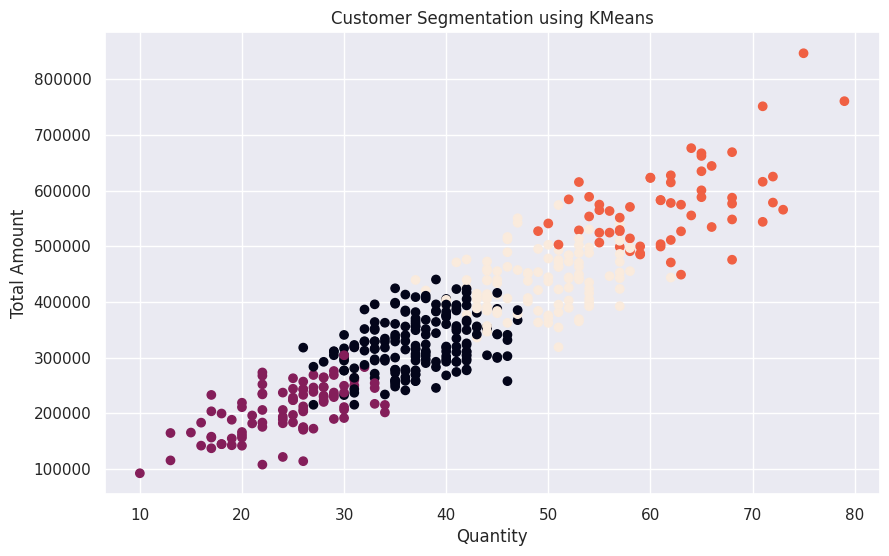

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(df_cluster['Qty'],
            df_cluster['TotalAmount'],
            c = df_cluster['Clusters'])
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Customer Segmentation using KMeans')
plt.show()

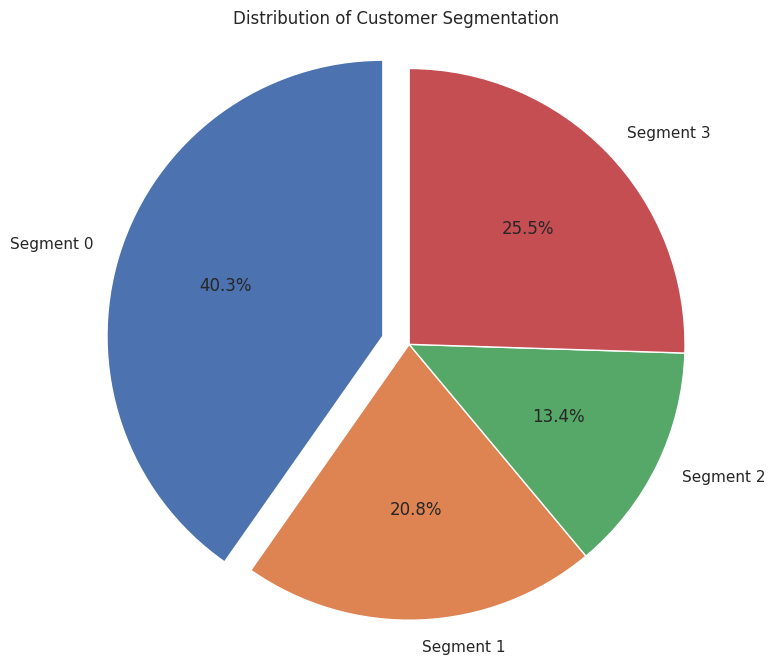

In [ ]:
percentage_0 = (len(df_cluster[df_cluster["Clusters"] == 0])/len(df_cluster)) * 100
percentage_1 = (len(df_cluster[df_cluster["Clusters"] == 1])/len(df_cluster)) * 100
percentage_2 = (len(df_cluster[df_cluster["Clusters"] == 2])/len(df_cluster)) * 100
percentage_3 = (len(df_cluster[df_cluster["Clusters"] == 3])/len(df_cluster)) * 100

pie = np.array([percentage_0, percentage_1, percentage_2, percentage_3])
plt.figure(figsize=(8,8))
plt.pie(pie, labels = ["Segment 0", "Segment 1", "Segment 2", "Segment 3"], explode = (0.1,0,0,0), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Segmentation')
plt.axis('equal')
plt.show()